In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

#Define (str to float) & (Unit Conver)
def tofloat(Serise_) :
  for num in range(0, len(Serise_)) :
    if (str(type(Serise_[num])) != "<class 'str'>" ) : continue

    if (Serise_[num].endswith('K')) : 
      Serise_[num] = Serise_[num].replace("K","")
      Serise_[num] = float(Serise_[num])* 1000
    else :
      Serise_[num] = Serise_[num].replace("M","")
      Serise_[num] = float(Serise_[num])  * 1000000
  return Serise_

#Define (yearoveride)
def yearoveride(y, recent) :
  if (y < 100) :
    y +=2000
    if (y>recent) :
      y -= 100
  return y

def Normalize(value, df, region) : 
  value = value / df[region]
  return value

def sub(Sales, mean, std) :
  if (Sales < mean-std) :
    return np.nan
  else : 
    return Sales

In [ ]:
#Load DataSet
path = "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv"
df_origin = pd.read_csv(path, index_col=[0])

df_origin.tail(8)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16591,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010.0,Adventure,Aqua Plus,0,0,0.05,0
16592,Madden NFL 2005,PS2,2004.0,Sports,Electronic Arts,4.18,0.26,0.01,80K
16593,Minna no Chizu 2,PSP,2007.0,Misc,Zenrin,0,0,0.02,0
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03
16598,The King of Fighters '95,PS,1996.0,Fighting,Sony Computer Entertainment,0,0,0.16,0.01


### 0,1,2,10 등 연도데이의 오류를 수정
### k,M등의 단위를 통일된 숫자로 표기

In [ ]:
df_Vgame = df_origin

# error values
## 
df_Vgame['Year'] = df_Vgame['Year'].apply(yearoveride, recent = 2020)

# data convert
## Dtype convert : str -> float
## unit convert : (value)k -> (value)* 1000 / (value)M -> (value)* 1000000
df_Vgame[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]  = df_Vgame[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].apply(tofloat, axis = 1)
df_Vgame.tail(8)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16591,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010.0,Adventure,Aqua Plus,0.0,0.0,50000.0,0.0
16592,Madden NFL 2005,PS2,2004.0,Sports,Electronic Arts,4180000.0,260000.0,10000.0,80000.0
16593,Minna no Chizu 2,PSP,2007.0,Misc,Zenrin,0.0,0.0,20000.0,0.0
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0
16598,The King of Fighters '95,PS,1996.0,Fighting,Sony Computer Entertainment,0.0,0.0,160000.0,10000.0


### 나라별 판매량의 총 합을 구함.

In [ ]:
# calcultate total_sales
df_Vgame['Total_Sales'] = df_Vgame[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)
df_Vgame

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0,40000.0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,180000.0
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0
...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0,200000.0
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0,10000.0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0,790000.0
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0,380000.0


# **연도별 선호하는 트렌드가 있을까**

### 연도에 따른 장르 선호도를 파악하기 위해 [연도,장르]의 데이터가 결측값인 데이터는 삭제

In [ ]:
# missing values 
## drop out missing values from Year,Genre
df_Vgame = df_Vgame.dropna(subset=['Year','Genre']).reset_index(drop=True)
df_Vgame.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
16272,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0,200000.0
16273,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0,10000.0
16274,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0,790000.0
16275,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0,380000.0
16276,The King of Fighters '95,PS,1996.0,Fighting,Sony Computer Entertainment,0.0,0.0,160000.0,10000.0,170000.0


### Pivot Table을 이용해 [장르별] [연도별] 데이터로 정리

In [ ]:
pdf_Vgame = pd.pivot_table(df_Vgame,                     # 피벗할 데이터프레임
                          index = 'Year',                # 행 위치에 들어갈 열
                          columns = 'Genre',             # 열 위치에 들어갈 열
                          values = 'Total_Sales',        # 데이터로 사용할 열
                          aggfunc = ['sum'])             # 데이터 집계함수
                          
Genre_list = ['Action', 'Adventure','Fighting','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy']

pdf_Vgame.columns = Genre_list
pdf_Vgame['Total_Sales'] = pdf_Vgame.iloc[0:].sum(axis=1)
pdf_Vgame.tail()

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total_Sales
Year,,,,,,,,,,,,,
2014.0,99010000.0,6090000.0,16150000.0,23730000.0,8870000.0,1510000.0,16710000.0,45890000.0,65990000.0,5540000.0,46640000.0,970000.0,337100000.0
2015.0,68250000.0,8010000.0,7780000.0,11660000.0,6050000.0,690000.0,7920000.0,36430000.0,66120000.0,5610000.0,41490000.0,1820000.0,261830000.0
2016.0,19850000.0,1810000.0,3850000.0,1150000.0,2080000.0,NaN,1670000.0,6750000.0,18170000.0,390000.0,14630000.0,520000.0,70870000.0
2017.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,40000.0,NaN,NaN,NaN,NaN,50000.0
2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290000.0,NaN,NaN,290000.0


### 데이터에 연도별 장르 데이터에 결측값이 있다는 것은 
### 데이터 수집단계에서의 불안정성을 뜻하므로 열 삭제

In [ ]:
pdf_Vgame = pdf_Vgame.dropna()
pdf_Vgame = pdf_Vgame.reset_index().fillna(0)
pdf_Vgame.tail()

,Year,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total_Sales
20,2011.0,119000000.0,15880000.0,22110000.0,55770000.0,28120000.0,5100000.0,34970000.0,53320000.0,99350000.0,15330000.0,57060000.0,9030000.0,515040000.0
21,2012.0,120810000.0,5900000.0,9530000.0,22930000.0,18560000.0,1740000.0,14430000.0,47770000.0,72840000.0,13370000.0,30900000.0,3330000.0,362110000.0
22,2013.0,125210000.0,6610000.0,7230000.0,25660000.0,25090000.0,1000000.0,13020000.0,30540000.0,62730000.0,8680000.0,41540000.0,6320000.0,353630000.0
23,2014.0,99010000.0,6090000.0,16150000.0,23730000.0,8870000.0,1510000.0,16710000.0,45890000.0,65990000.0,5540000.0,46640000.0,970000.0,337100000.0
24,2015.0,68250000.0,8010000.0,7780000.0,11660000.0,6050000.0,690000.0,7920000.0,36430000.0,66120000.0,5610000.0,41490000.0,1820000.0,261830000.0


In [ ]:
# pdf_Vgame['Total_Sales'] = pdf_Vgame['Total_Sales'].apply(sub, mean = pdf_Vgame['Total_Sales'].mean(), std = pdf_Vgame['Total_Sales'].std())
# pdf_Vgame.dropna(inplace = True)
# pdf_Vgame.tail()

### 연도별 트렌드 = 해당 연도의 점유율을 뜻한다고 가정,
### 연도별 (장르별 매출)/(총매출)을 통해 점유율을 구함.

In [ ]:
cpydf_Vgame = pd.DataFrame(data = pdf_Vgame, index= pdf_Vgame.index, columns=pdf_Vgame.columns)
n_pdf_Vgame = pd.DataFrame(data = pdf_Vgame['Year'], index= pdf_Vgame.index, columns=pdf_Vgame.columns)

for key in Genre_list :
   n_pdf_Vgame[key] = cpydf_Vgame[key] / cpydf_Vgame['Total_Sales']
n_pdf_Vgame.drop(['Total_Sales'],axis=1,inplace=True)

n_pdf_Vgame.head()

,Year,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1991.0,0.209742,0.069500,0.012101,0.002482,0.236736,0.100527,0.035371,0.101148,0.061744,0.066708,0.074775,0.029165
1,1992.0,0.050433,0.160757,0.200026,0.064880,0.176123,0.063567,0.118860,0.090097,0.003677,0.028106,0.038744,0.004728
2,1993.0,0.039356,0.001522,0.190259,0.006523,0.406175,0.068928,0.007828,0.121548,0.066971,0.004131,0.069145,0.017613
3,1994.0,0.019566,0.047210,0.106917,0.036102,0.363040,0.019313,0.027518,0.090003,0.104772,0.034335,0.106160,0.045064
4,1995.0,0.040631,0.008058,0.168426,0.072523,0.189422,0.030530,0.069118,0.161957,0.047100,0.047327,0.090682,0.074225


### 시각화를 위해 tidy 데이터로 만듦

In [ ]:
tdf_Vgame = pd.melt(n_pdf_Vgame,["Year"], var_name="Genre", value_name="Sales")
tdf_Vgame.head()

,Year,Genre,Sales
0,1991.0,Action,0.209742
1,1992.0,Action,0.050433
2,1993.0,Action,0.039356
3,1994.0,Action,0.019566
4,1995.0,Action,0.040631


<Figure size 2304x2304 with 0 Axes>

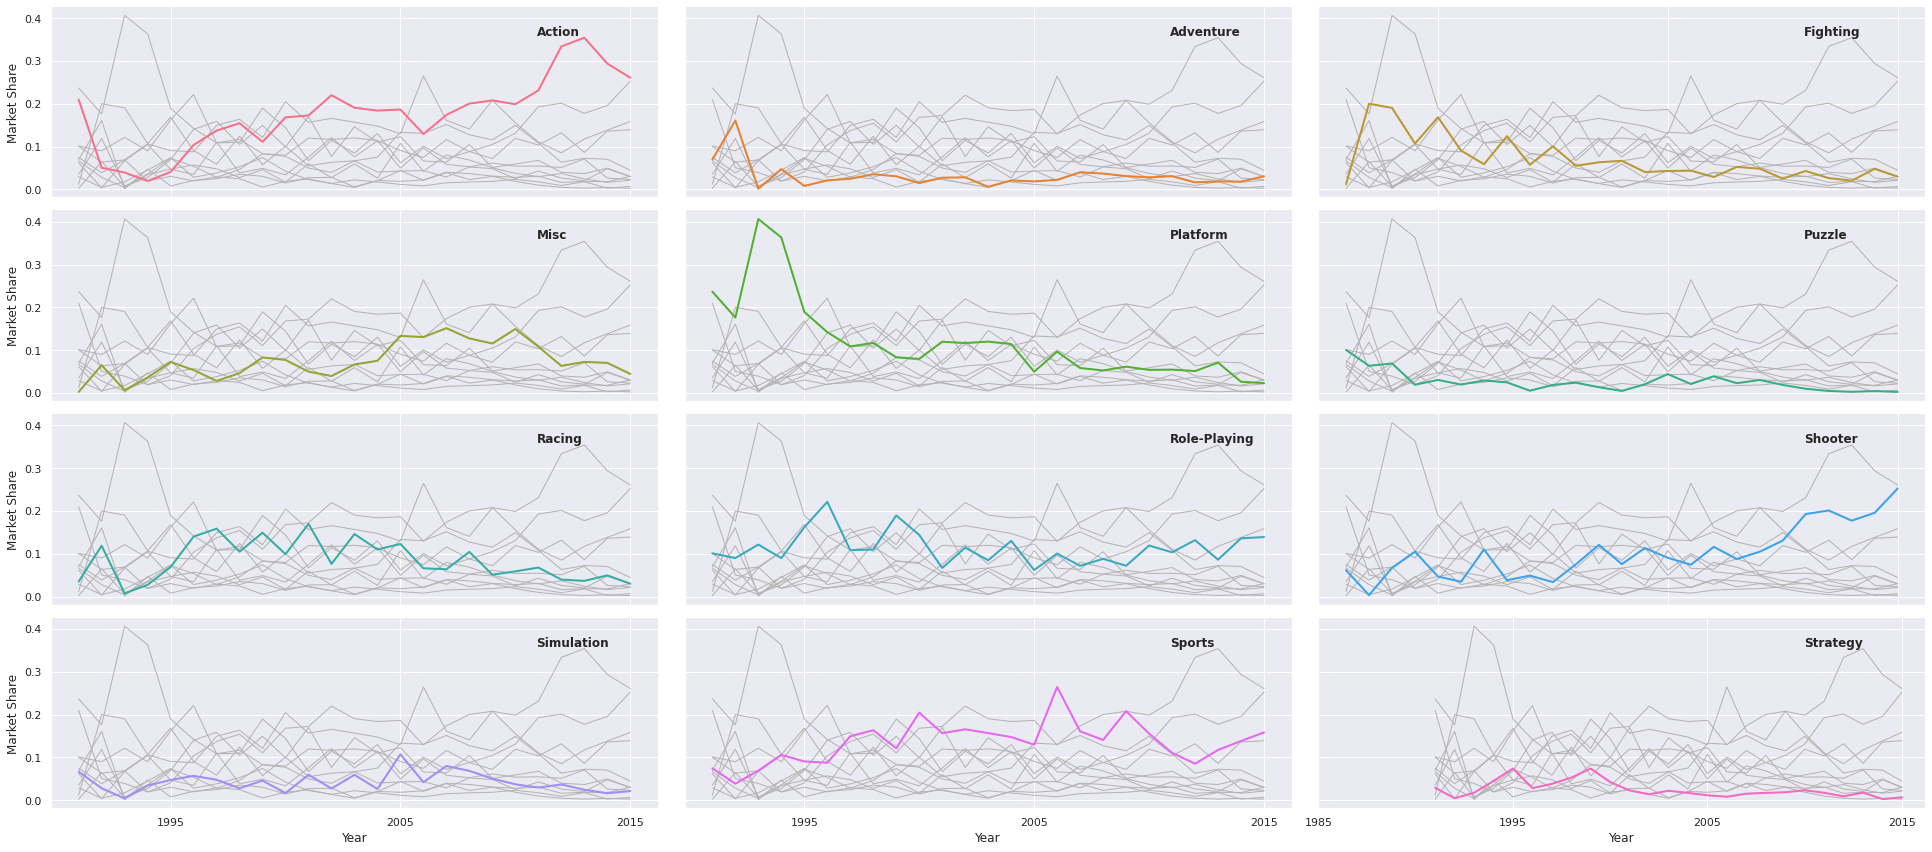

In [ ]:
plt.figure(figsize=(32, 32))
sns.set_theme(style="darkgrid")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=tdf_Vgame,
    x="Year", y="Sales", col="Genre", hue="Genre",
    kind="line", color = 'red', linewidth=2, zorder=10,
    col_wrap=3, height=3, aspect=3, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=tdf_Vgame, x="Year", y="Sales", units="Genre",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("Year", "Market Share")
g.tight_layout()

# 연도별 트렌드가 없다면 그래프는 수평을 그릴 것이다.
# 그래프의 변화가 뚜렷이 나타나므로 연도별 트렌드는 존재한다.